# Analysis of IMDB Data

We will analyze a subset of IMDB's actors, genres, movie actors, and movie ratings data. This dataset comes to us from Kaggle (https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset) although we have taken steps to pull this data into a public S3 bucket: 

* s3://cis9760-lecture9-movieanalysis/name.basics.new.tsv ---> Name Basics
* s3://cis9760-lecture9-movieanalysis/title.basic.new.tsv ---> Title Basics
* s3://cis9760-lecture9-movieanalysis/title.principles.new.tsv ---> Title Principles
* s3://cis9760-lecture9-movieanalysis/title.ratings.new.tsv ---> Title Ratings

# Content

**<br />name.basics.tsv.gz – Contains the following information for names:**
<br />nconst (string) - alphanumeric unique identifier of the name/person.
<br />primaryName (string)– name by which the person is most often credited.
<br />birthYear – in YYYY format.
<br />deathYear – in YYYY format if applicable, else .
<br />primaryProfession (array of strings)– the top-3 professions of the person.
<br />knownForTitles (array of tconsts) – titles the person is known for.
<br/><br/>
**<br />title.basics.tsv.gz - Contains the following information for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc).
<br />primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release.
<br />originalTitle (string) - original title, in the original language.
<br />isAdult (boolean) - 0: non-adult title; 1: adult title.
<br />startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year.
<br />endYear (YYYY) – TV Series end year. for all other title types.
<br />runtimeMinutes – primary runtime of the title, in minutes.
<br />genres (string array) – includes up to three genres associated with the title.
<br/><br/>
**<br />title.principals.tsv – Contains the principal cast/crew for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />ordering (integer) – a number to uniquely identify rows for a given titleId.
<br />nconst (string) - alphanumeric unique identifier of the name/person.
<br />category (string) - the category of job that person was in.
<br />job (string) - the specific job title if applicable, else.
<br />characters (string) - the name of the character played if applicable, else.
<br/><br/>
**<br />title.ratings.tsv.gz – Contains the IMDb rating and votes information for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />averageRating – weighted average of all the individual user ratings.
<br />numVotes - number of votes the title has received.

# PART 1 - Installation and Initial Setup

In [1]:
%%info

Begin by installing the necessary libraries that you may need to conduct your analysis. At the very least, you must install pandas and matplotlib

Let's install the necessary packages here

In [2]:
sc.install_pypi_package("pandas")
sc.install_pypi_package("python-dateutil")
sc.install_pypi_package("matplotlib")
sc.install_pypi_package("cycler")
sc.install_pypi_package("pyparsing")
sc.install_pypi_package("kiwisolver")
sc.install_pypi_package("typing-extensions")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
4,application_1733752468724_0005,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Now, import the installed packages from the previous block below.

In [3]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from cycler import cycler
import pyparsing
from typing_extensions import Protocol 
import numpy as np

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Loading Data

Load all data from S3 into a Spark dataframe object 

In [4]:
df1 = spark.read.csv('s3://cis9760-lecture9-movieanalysis/name.basics.new.tsv', header='true', inferSchema = True, sep='\t')
df2 = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.basic.new.tsv', header='true', inferSchema = True,  sep='\t')
df3 = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.principles.new.tsv', header='true', inferSchema = True,  sep='\t')
df4 = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.ratings.new.tsv', header='true', inferSchema = True,  sep='\t')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Name Basics

Display the schema below:

In [5]:
df1.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- nconst: string (nullable = true)
 |-- primaryName: string (nullable = true)
 |-- birthYear: string (nullable = true)
 |-- deathYear: string (nullable = true)
 |-- primaryProfession: string (nullable = true)
 |-- knownForTitles: string (nullable = true)

Display the first 15 rows with the following columns:

* `nconst`
* `primaryName`
* `primaryProfession`
* `birthYear`

In [40]:
df1.createOrReplaceTempView('Name_Basics')
spark.sql('''SELECT `nconst`, `primaryName`, `primaryProfession`, `birthYear` 
            FROM Name_Basics''').show(15)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------------+--------------------+---------+
|   nconst|        primaryName|   primaryProfession|birthYear|
+---------+-------------------+--------------------+---------+
|nm0000001|       Fred Astaire|soundtrack,actor,...|     1899|
|nm0000002|      Lauren Bacall|  actress,soundtrack|     1924|
|nm0000003|    Brigitte Bardot|actress,soundtrac...|     1934|
|nm0000004|       John Belushi|actor,soundtrack,...|     1949|
|nm0000005|     Ingmar Bergman|writer,director,a...|     1918|
|nm0000006|     Ingrid Bergman|actress,soundtrac...|     1915|
|nm0000007|    Humphrey Bogart|actor,soundtrack,...|     1899|
|nm0000008|      Marlon Brando|actor,soundtrack,...|     1924|
|nm0000009|     Richard Burton|actor,soundtrack,...|     1925|
|nm0000010|       James Cagney|actor,soundtrack,...|     1899|
|nm0000011|        Gary Cooper|actor,soundtrack,...|     1901|
|nm0000012|        Bette Davis|actress,soundtrac...|     1908|
|nm0000013|          Doris Day|soundtrack,actres...|   

## Title Basics

Display the first 5 rows with the following columns:
    
* `tconst`    
* `titleType`
* `primaryTitle`
* `genres`

In [41]:
df2.createOrReplaceTempView('Title_Basics')
spark.sql('''SELECT `tconst`, `titleType`, `primaryTitle`, `genres` 
            FROM Title_Basics''').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+--------------------+--------------------+
|   tconst|titleType|        primaryTitle|              genres|
+---------+---------+--------------------+--------------------+
|tt0000001|    short|          Carmencita|   Documentary,Short|
|tt0000002|    short|Le clown et ses c...|     Animation,Short|
|tt0000003|    short|      Pauvre Pierrot|Animation,Comedy,...|
|tt0000004|    short|         Un bon bock|     Animation,Short|
|tt0000005|    short|    Blacksmith Scene|        Comedy,Short|
+---------+---------+--------------------+--------------------+
only showing top 5 rows

Display the unique title types below:

In [8]:
df2.select("titleType").distinct().show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+
|titleType   |
+------------+
|tvSeries    |
|tvMiniSeries|
|movie       |
|videoGame   |
|tvSpecial   |
|video       |
|tvMovie     |
|tvEpisode   |
|tvShort     |
|short       |
|tvPilot     |
+------------+

Display the schema below:

In [9]:
df2.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: string (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)

Remove the 'originalTitle' from the dataframe and display the schema to verify it.

In [10]:
df2.drop('originalTitle').printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- isAdult: string (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)

## Title Principles

Display the schema below:

In [11]:
df3.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- ordering: integer (nullable = true)
 |-- nconst: string (nullable = true)
 |-- category: string (nullable = true)
 |-- job: string (nullable = true)
 |-- characters: string (nullable = true)

Display the first 15 rows where the "category" column is "producer"

In [42]:
df3.createOrReplaceTempView('Category_Producer')
spark.sql('''SELECT * 
            FROM Category_Producer
            WHERE category='producer' ''').show(15)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------+---------+--------+--------+----------+
|   tconst|ordering|   nconst|category|     job|characters|
+---------+--------+---------+--------+--------+----------+
|tt0000003|       2|nm1770680|producer|producer|        \N|
|tt0000005|       4|nm0249379|producer|producer|        \N|
|tt0000007|       5|nm0249379|producer|producer|        \N|
|tt0000020|       2|nm0666972|producer|producer|        \N|
|tt0000024|       4|nm0666972|producer|producer|        \N|
|tt0000025|       2|nm0666972|producer|producer|        \N|
|tt0000039|       1|nm0666972|producer|producer|        \N|
|tt0000041|       2|nm0525908|producer|producer|        \N|
|tt0000061|       3|nm0666972|producer|producer|        \N|
|tt0000089|       3|nm0525910|producer|producer|        \N|
|tt0000104|       1|nm0525910|producer|producer|        \N|
|tt0000121|       5|nm0666972|producer|producer|        \N|
|tt0000125|       1|nm0666972|producer|producer|        \N|
|tt0000147|       6|nm0103755|producer|p

## Title Ratings

Display the schema below:

In [13]:
df4.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- averageRating: double (nullable = true)
 |-- numVotes: integer (nullable = true)

Display the first 10 rows in a descending order by the number of votes

In [43]:
df4.createOrReplaceTempView('dscorder')
spark.sql('''SELECT * 
            FROM dscorder
            ORDER BY numVotes DESC''').show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+--------+
|   tconst|averageRating|numVotes|
+---------+-------------+--------+
|tt0111161|          9.3| 2868594|
|tt0468569|          9.0| 2850372|
|tt1375666|          8.8| 2531543|
|tt0137523|          8.8| 2303989|
|tt0944947|          9.2| 2265760|
|tt0109830|          8.8| 2239746|
|tt0110912|          8.9| 2203191|
|tt0903747|          9.5| 2114358|
|tt0816692|          8.7| 2073181|
|tt0133093|          8.7| 2038364|
+---------+-------------+--------+
only showing top 10 rows

# Overview of Data

Display the number of rows and columns in each dataFrame object.

In [15]:
print(f"Number of columns in Name Basics table: {len(df1.columns)}")
print(f"Number of rows in Name Basics table: {df1.count()}\n")

print(f"Number of columns in Title Basics table: {len(df2.columns)}")
print(f"Number of rows in Title Basics table: {df2.count()}\n")

print(f"Number of columns in Title Principles table: {len(df3.columns)}")
print(f"Number of rows in Title Principles table: {df3.count()}\n")

print(f"Number of columns in Title Ratings table: {len(df4.columns)}")
print(f"Number of rows in Title Ratings table: {df4.count()}\n")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of columns in Name Basics table: 6
Number of rows in Name Basics table: 13329316

Number of columns in Title Basics table: 9
Number of rows in Title Basics table: 10613322

Number of columns in Title Principles table: 6
Number of rows in Title Principles table: 60833800

Number of columns in Title Ratings table: 3
Number of rows in Title Ratings table: 1412275

# PART 2 - Analyzing Movie Genres

Let's now answer this question: how many unique movie genres are represented in this dataset?

Essentially, we have the genres per movie as a list - this is useful to quickly see what each movie might be represented as but it is difficult to easily answer questions such as:

* How many movies are categorized as Comedy, for instance?
* What are the top 20 most popular genres available?

## Association Table

We need to "break out" these genres from the tconst? One common approach to take is to build an association table mapping a single tconst multiple times to each distinct genre.

For instance, given the following:


| tconst   | titleType  |genres |
|----------|------------|-------|
| abcd123  | XXX        |a,b,c  |

We would like to derive something like:

| tconst   |  titleType |genre |
|----------|------------|------|
| abcd123  | XXX        |a     |
| abcd123  | XXX        |b     |
| abcd123  | XXX        |c     |


What this does is allow us to then perform a myriad of rollups and other analysis on this association table which can aid us in answering the questions asked above.

Implement the code necessary to derive the table described from the data set

In [44]:
df2.createOrReplaceTempView('table1')
spark.sql('''SELECT `tconst`, `titleType`, `genres` 
            FROM table1''').show(15)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+--------------------+
|   tconst|titleType|              genres|
+---------+---------+--------------------+
|tt0000001|    short|   Documentary,Short|
|tt0000002|    short|     Animation,Short|
|tt0000003|    short|Animation,Comedy,...|
|tt0000004|    short|     Animation,Short|
|tt0000005|    short|        Comedy,Short|
|tt0000006|    short|               Short|
|tt0000007|    short|         Short,Sport|
|tt0000008|    short|   Documentary,Short|
|tt0000009|    movie|             Romance|
|tt0000010|    short|   Documentary,Short|
|tt0000011|    short|   Documentary,Short|
|tt0000012|    short|   Documentary,Short|
|tt0000013|    short|   Documentary,Short|
|tt0000014|    short|        Comedy,Short|
|tt0000015|    short|     Animation,Short|
+---------+---------+--------------------+
only showing top 15 rows

Display the first 25 rows of your association table below

In [17]:
from pyspark.sql.functions import col, split, explode
newdf2 = df2.withColumn("genre", explode(split(df2["genres"], ",")))
newdf2.select("tconst", "titleType", "genre").show(25, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+-----------+
|tconst   |titleType|genre      |
+---------+---------+-----------+
|tt0000001|short    |Documentary|
|tt0000001|short    |Short      |
|tt0000002|short    |Animation  |
|tt0000002|short    |Short      |
|tt0000003|short    |Animation  |
|tt0000003|short    |Comedy     |
|tt0000003|short    |Romance    |
|tt0000004|short    |Animation  |
|tt0000004|short    |Short      |
|tt0000005|short    |Comedy     |
|tt0000005|short    |Short      |
|tt0000006|short    |Short      |
|tt0000007|short    |Short      |
|tt0000007|short    |Sport      |
|tt0000008|short    |Documentary|
|tt0000008|short    |Short      |
|tt0000009|movie    |Romance    |
|tt0000010|short    |Documentary|
|tt0000010|short    |Short      |
|tt0000011|short    |Documentary|
|tt0000011|short    |Short      |
|tt0000012|short    |Documentary|
|tt0000012|short    |Short      |
|tt0000013|short    |Documentary|
|tt0000013|short    |Short      |
+---------+---------+-----------+
only showing t

## Total Unique Movie Genres

What is the total number of unique movie genres?

In [18]:
from pyspark.sql.functions import countDistinct
df2_2 = newdf2.select(countDistinct("genre")).collect()[0][0]
print(df2_2)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

29

What are the unique movie genres?

In [19]:
newdf2.select("genre").distinct().show(29, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|genre      |
+-----------+
|Mystery    |
|Musical    |
|Sport      |
|Action     |
|Talk-Show  |
|Romance    |
|Thriller   |
|\N         |
|Reality-TV |
|Family     |
|Fantasy    |
|History    |
|Animation  |
|Film-Noir  |
|Short      |
|Sci-Fi     |
|News       |
|Drama      |
|Documentary|
|Western    |
|Comedy     |
|Crime      |
|War        |
|Game-Show  |
|Adult      |
|Music      |
|Biography  |
|Adventure  |
|Horror     |
+-----------+

Oops! Something is off!

In [20]:
from pyspark.sql.functions import col
newdf2.filter(col("genre") != "\\N") \
      .select("genre") \
      .distinct() \
      .show(29, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|genre      |
+-----------+
|Mystery    |
|Musical    |
|Sport      |
|Action     |
|Talk-Show  |
|Romance    |
|Thriller   |
|Reality-TV |
|Family     |
|Fantasy    |
|History    |
|Animation  |
|Film-Noir  |
|Short      |
|Sci-Fi     |
|News       |
|Drama      |
|Documentary|
|Western    |
|Comedy     |
|Crime      |
|War        |
|Game-Show  |
|Adult      |
|Music      |
|Biography  |
|Adventure  |
|Horror     |
+-----------+

## Top Genres by Movies

Now let's find the highest rated genres in this dataset by rolling up genres.

### Average Rating / Genre

So now, let's unroll our distinct count a bit and display the per average rating value of per genre.

The expected output should be:

| genre | averageRating |
|-------------|------------|
| a     | 8.5         |
| b     | 6.3         |
| c     | 7.2         |

Or something to that effect.

First, let's join our two dataframes (title ratings and title basics) by tconst. Use inner join.

In [21]:
join_table = newdf2.join(df4, on='tconst', how='inner')
join_table1 = join_table.filter((col('titleType') == 'movie') & (col('genre') != "\\N")) \
                        .select('genre', 'averageRating')
join_table1.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+
|    genre|averageRating|
+---------+-------------+
|    Drama|          4.2|
|    Drama|          4.5|
|Biography|          3.6|
|    Drama|          3.6|
|  History|          3.6|
|    Drama|          6.0|
|    Drama|          5.0|
|  History|          5.0|
|Biography|          6.2|
|    Drama|          6.2|
+---------+-------------+
only showing top 10 rows

Now, let's aggregate along the averageRating column to get a resultant dataframe that displays average rating per genre.

In [22]:
from pyspark.sql.functions import avg, format_number

ratingavg = join_table1.groupBy("genre").agg(format_number(avg("averageRating"), 3).alias("Rating"))
ratingavg.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+------+
|      genre|Rating|
+-----------+------+
|    Mystery| 5.847|
|    Musical| 6.187|
|     Action| 5.732|
|      Sport| 6.623|
|  Talk-Show| 6.858|
|    Romance| 6.102|
|   Thriller| 5.613|
| Reality-TV| 6.701|
|     Family| 6.205|
|    Fantasy| 5.898|
|    History| 6.798|
|  Animation| 6.367|
|  Film-Noir| 6.463|
|     Sci-Fi| 5.353|
|       News| 7.203|
|      Drama| 6.248|
|Documentary| 7.216|
|    Western| 5.840|
|     Comedy| 5.906|
|      Crime| 5.985|
+-----------+------+
only showing top 20 rows

### Horizontal Bar Chart of Top Genres

With this data available, let us now build a barchart of all genres 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

In [23]:
ratingavg.createOrReplaceTempView("Top_Genres")

TopGenres_sql = spark.sql('''SELECT genre, AVG(Rating) AS Rating
                                FROM Top_Genres
                                GROUP BY genre
                                ORDER BY Rating DESC''')

TopGenres_sql.show(29)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+------+
|      genre|Rating|
+-----------+------+
|Documentary| 7.216|
|       News| 7.203|
|  Biography| 6.951|
|  Game-Show|  6.88|
|  Talk-Show| 6.858|
|    History| 6.798|
|      Music| 6.755|
| Reality-TV| 6.701|
|      Sport| 6.623|
|  Film-Noir| 6.463|
|        War| 6.403|
|  Animation| 6.367|
|      Drama| 6.248|
|     Family| 6.205|
|    Musical| 6.187|
|    Romance| 6.102|
|      Crime| 5.985|
|     Comedy| 5.906|
|    Fantasy| 5.898|
|  Adventure| 5.866|
|    Mystery| 5.847|
|    Western|  5.84|
|     Action| 5.732|
|   Thriller| 5.613|
|      Adult| 5.554|
|     Sci-Fi| 5.353|
|     Horror| 5.002|
|      Short|   5.0|
+-----------+------+

You do not have to match the color and the figure size but all other aspects of the graph should be matched.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

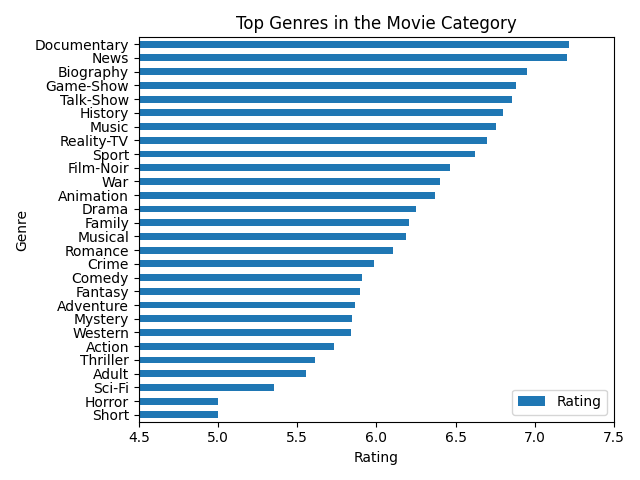

In [24]:
df = TopGenres_sql.toPandas()
df.sort_values(by='Rating').plot.barh(x='genre', y='Rating')
plt.title('Top Genres in the Movie Category')
plt.xlabel('Rating')
plt.ylabel('Genre')
plt.xlim(4.5, 7.5)
plt.tight_layout()
plt.show()

%matplot plt

## PART 3 - Analyzing Job Categories

## Total Unique Job Categories

What is the total number of unique job categories?

In [25]:
df3.createOrReplaceTempView('Title_Principles')
spark.sql('''SELECT tconst, category
FROM Title_Principles''').show(30)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------------+
|   tconst|       category|
+---------+---------------+
|tt0000001|           self|
|tt0000001|       director|
|tt0000001|cinematographer|
|tt0000002|       director|
|tt0000002|       composer|
|tt0000003|       director|
|tt0000003|       producer|
|tt0000003|       composer|
|tt0000003|         editor|
|tt0000004|       director|
|tt0000004|       composer|
|tt0000005|          actor|
|tt0000005|          actor|
|tt0000005|       director|
|tt0000005|       producer|
|tt0000006|       director|
|tt0000007|          actor|
|tt0000007|          actor|
|tt0000007|       director|
|tt0000007|       director|
|tt0000007|       producer|
|tt0000008|          actor|
|tt0000008|       director|
|tt0000008|cinematographer|
|tt0000009|        actress|
|tt0000009|          actor|
|tt0000009|          actor|
|tt0000009|       director|
|tt0000010|       director|
|tt0000011|          actor|
+---------+---------------+
only showing top 30 rows

In [26]:
df3.select("category").distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

12

What are the unique job categories available?

In [27]:
df3.select("category").distinct().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+
|           category|
+-------------------+
|            actress|
|           producer|
|production_designer|
|             writer|
|              actor|
|    cinematographer|
|      archive_sound|
|    archive_footage|
|               self|
|             editor|
|           composer|
|           director|
+-------------------+

## Top Job Categories

Now let's find the top job categories in this dataset by rolling up categories.

### Counts of Titles / Job Category

The expected output should be:

| category | count |
|-------------|------------|
| a     | 15         |
| b     | 2          |
| c     | 45          |

Or something to that effect.

In [47]:
df3.createOrReplaceTempView('Title_Principles')
spark.sql('''SELECT category, COUNT(*) AS count
            FROM Title_Principles
            GROUP BY category''').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+--------+
|           category|   count|
+-------------------+--------+
|            actress|10492210|
|           producer| 3944711|
|production_designer|  383761|
|             writer| 8495903|
|              actor|13443688|
|    cinematographer| 2068164|
|      archive_sound|    4794|
|    archive_footage|  404581|
|               self|10562296|
|             editor| 2012800|
|           composer| 2014049|
|           director| 7006843|
+-------------------+--------+

### Bar Chart of Top Job Categories

With this data available, let us now build a barchart of the top 5 categories. 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

In [29]:
df3.createOrReplaceTempView("Top_Categories")
TopCategories_sql = spark.sql('''SELECT category, COUNT(*) AS count
                                FROM Top_Categories
                                GROUP BY category
                                ORDER BY count DESC''')
TopCategories_sql.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+--------+
|           category|   count|
+-------------------+--------+
|              actor|13443688|
|               self|10562296|
|            actress|10492210|
|             writer| 8495903|
|           director| 7006843|
|           producer| 3944711|
|    cinematographer| 2068164|
|           composer| 2014049|
|             editor| 2012800|
|    archive_footage|  404581|
|production_designer|  383761|
|      archive_sound|    4794|
+-------------------+--------+

You do not have to match the color and the figure size but all other aspects of the graph should be matched.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

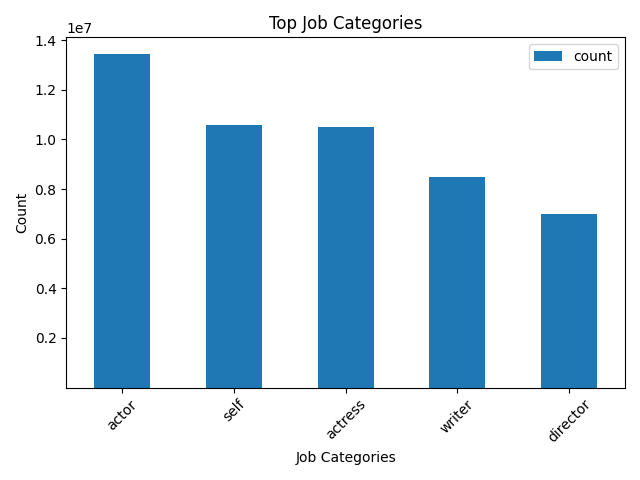

In [30]:
df = TopCategories_sql.toPandas()
plt.figure(figsize=(5, 5))
df.sort_values(by='count', ascending=False).head(5).plot.bar(x='category', y='count')
plt.title('Top Job Categories')
plt.xlabel('Job Categories')
plt.ylabel('Count')
plt.ylim(1.4-0.4)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

%matplot plt

# PART 4 - Answer to the following questions:

1) You will need to join tables to answer the following questions. Not every question will require four tables. 
2) Your code should meet all the requirements asked in the questions.
3) Your code should be generalizable enough for any given arguments.

## 1) Which movies, released in 2023, have received more than 50,000 votes and have an average rating of 8 or higher?

In [31]:
(df2.filter((col('startYear') == 2003) & (col('titleType') == 'movie'))
       .join(df4, on='tconst', how='inner')
       .filter((col('numVotes') > 50000) & (col('averageRating') >= 8))
       .select(col('primaryTitle').alias('Movie'),
           col('averageRating').alias('Ratings'),
           col('numVotes').alias('Number of Votes'))
       .sort(col('Ratings').desc())).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------+---------------+
|               Movie|Ratings|Number of Votes|
+--------------------+-------+---------------+
|The Lord of the R...|    9.0|        1965196|
|              Oldboy|    8.3|         630695|
|        Finding Nemo|    8.2|        1106772|
|   Kill Bill: Vol. 1|    8.2|        1184605|
|  Memories of Murder|    8.1|         213610|
|Pirates of the Ca...|    8.1|        1202458|
| Munna Bhai M.B.B.S.|    8.1|          87972|
|Spring, Summer, F...|    8.0|          86510|
|            Dogville|    8.0|         157921|
|            Big Fish|    8.0|         457515|
+--------------------+-------+---------------+

In [50]:
result =(df1.filter(col('primaryName') == 'Cillian Murphy')
    .join(df3, on='nconst', how='inner')
    .filter(col('category') == 'actor')
    .join(df2, on='tconst', how='inner')
    .filter((col('titleType') == 'movie') & (col('startYear') >= 2007))
    .join(df4, on='tconst', how='inner')
    .select(col('primaryTitle').alias('Movies'), col('startYear').alias('Year'),
            col('averageRating').alias('Avg Rating')).sort(col('Year').desc()))

result.show(truncate=False)
highest_rated = result.orderBy(col('Avg Rating').desc()).limit(1).collect()[0]

print(f"Highest rated movie: {highest_rated['Movies']} with a rating of {highest_rated['Avg Rating']}")


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------------+----+----------+
|Movies                 |Year|Avg Rating|
+-----------------------+----+----------+
|Small Things Like These|2024|7.2       |
|Oppenheimer            |2023|8.4       |
|Kensuke's Kingdom      |2023|7.1       |
|A Quiet Place Part II  |2020|7.2       |
|Anna                   |2019|6.6       |
|Anthropoid             |2016|7.2       |
|Free Fire              |2016|6.3       |
|In the Heart of the Sea|2015|6.9       |
|Transcendence          |2014|6.2       |
|Aloft                  |2014|5.3       |
|Red Lights             |2012|6.2       |
|Retreat                |2011|5.8       |
|In Time                |2011|6.7       |
|Peacock                |2010|6.2       |
|Perrier's Bounty       |2009|6.3       |
|Waveriders             |2008|6.8       |
|Sunshine               |2007|7.2       |
|Watching the Detectives|2007|6.2       |
+-----------------------+----+----------+

Highest rated movie: Oppenheimer with a rating of 8.4

## 3) How many movies has Zendaya featured as an actress in each year?

In [33]:
(df1.filter(col('primaryName') == 'Zendaya')
       .join(df3, on='nconst', how='inner')
       .filter(col('category') == 'actress')
       .join(df2, on='tconst', how='inner')
       .filter((col('titleType') == 'movie') & (col('startYear') != '\\N'))
       .groupBy(col('startYear').alias('Year'))
       .count()
       .sort(col('Year').desc())).show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+-----+
|Year|count|
+----+-----+
|2024|2    |
|2021|3    |
|2018|2    |
|2017|1    |
+----+-----+

## 4) At what age did Audrey Hepburn, known for her role in the movie 'Breakfast at Tiffany's,' pass away?

In [34]:
age = df1.filter(col('primaryName') == 'Audrey Hepburn') \
    .select((col('deathYear').cast('int') - col('birthYear').cast('int')).alias('Age at Death')) \
    .collect()[0]['Age at Death']

print(f"Audrey Hepburn passed away at the age of {age}.")


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Audrey Hepburn passed away at the age of 64.

## 5) What is the movie(s) with the highest average rating among those featuring Chris Evans, known for his role in 'Captain America: The First Avenger'?

Write your code in a way that it finds and displays all movies with the highest rating, even if there's more than one. 

In [35]:
(df1.filter(col('primaryName') == 'Chris Evans')
       .join(df3, on='nconst', how='inner')
       .filter(col('category') == 'actor')
       .join(df2, on='tconst', how='inner')
       .filter(col('titleType') == 'movie')
       .join(df4, on='tconst', how='inner')
       .select(col('primaryTitle').alias('Movies'),
               col('averageRating').alias('Highest Avg Rating'))
       .sort(col('Highest Avg Rating').desc())).show(2)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|              Movies|Highest Avg Rating|
+--------------------+------------------+
|Avengers: Infinit...|               8.4|
|   Avengers: Endgame|               8.4|
+--------------------+------------------+
only showing top 2 rows

## 6) Among the movies in which Clint Eastwood, known for 'The Good, the Bad and the Ugly', and Harrison Ford, known for 'Raiders of the Lost Ark', have acted, who has the higher average rating?

Hint: You will need to calculate the average rating across all movies for each actor.

In [36]:
#tried everything, even exploded knownfortitles but still this was the only code that 
#gave me the closest 
#result to Harrison, would like some feedback about this one

clint_avg_rating = (df1.filter(col('primaryName') == 'Clint Eastwood')
       .join(df3, on='nconst', how='inner')
       .filter(col('category') == 'actor')
       .join(df2, on='tconst', how='inner')
       .filter(col('titleType') == 'movie')
       .join(df4, on='tconst', how='inner')
       .agg(avg(col('averageRating')).alias('Clint Avg Rating'))
       .collect()[0]['Clint Avg Rating'])

harrison_avg_rating = (df1.filter((col('primaryName') == 'Harrison Ford') &
        (col('primaryProfession').contains('actor')))
        .join(df3, on='nconst', how='inner')
        .join(df2, on='tconst', how='inner')
        .filter(col('titleType') == 'movie')
        .join(df4, on='tconst', how='inner')
        .agg(avg(col('averageRating')).alias('Harrison Avg Rating'))
        .collect()[0]['Harrison Avg Rating'])

print(f"The average rating of Harrison Ford is {harrison_avg_rating:.2f}")
print(f"The average rating of Clint Eastwood is {clint_avg_rating:.2f}")

if clint_avg_rating > harrison_avg_rating:
    print("Clint Eastwood has a higher average rating")
else:
    print("Harrison Ford has a higher average rating")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

The average rating of Harrison Ford is 6.63
The average rating of Clint Eastwood is 6.86
Clint Eastwood has a higher average rating

## 7) What are the movies in which both Johnny Depp and Helena Bonham Carter have acted together?

In [37]:
depp_titles = (df2.join(df3, on='tconst', how='inner')
       .join(df1, on='nconst', how='inner')
       .filter((col('titleType') == 'movie') & (col('primaryName') == 'Johnny Depp') &
               (col('category') == 'actor'))
       .select(col('tconst'), col('primaryTitle')).distinct())

carter_titles = (df2.join(df3, on='tconst', how='inner')
       .join(df1, on='nconst', how='inner')
       .filter((col('titleType') == 'movie') & (col('primaryName') == 'Helena Bonham Carter') &
               (col('category') == 'actress'))
       .select(col('tconst'), col('primaryTitle').alias('Carter_movies')).distinct())

acted_together = ( depp_titles.join(carter_titles, on='tconst', how='inner')
               .select(col('primaryTitle').alias('Common Movies'))
               .distinct())

acted_together.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------------------------+
|Common Movies                                 |
+----------------------------------------------+
|Corpse Bride                                  |
|Dark Shadows                                  |
|Charlie and the Chocolate Factory             |
|Alice Through the Looking Glass               |
|Sweeney Todd: The Demon Barber of Fleet Street|
|Alice in Wonderland                           |
+----------------------------------------------+

## 8) Among the TV series featuring David Tennant, who is known for his role in Doctor Who, which rank in the top 5 for viewer engagement? Does Doctor Who make it into the highest-ranked series?

In [38]:
tv_series = (df1.filter(col('primaryName') == 'David Tennant')
       .join(df3, on='nconst', how='inner')
       .filter(col('category') == 'actor')
       .join(df2, on='tconst', how='inner')
       .filter(col('titleType') == 'tvSeries')
       .join(df4, on='tconst', how='inner')
       .select(col('primaryTitle').alias('TV Series'),col('numVotes').alias('Number of Votes'))
       .sort(col('Number of Votes').desc()))

tv_series.show(5)

top_5_results = tv_series.limit(5).collect()

for row in top_5_results:
    if row['TV Series'] == "Doctor Who":
        print(f"Doctor Who is in the top 5 TV series for viewer engagement with {row['Number of Votes']} votes.")


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------+---------------+
|    TV Series|Number of Votes|
+-------------+---------------+
|   Doctor Who|         245190|
|Jessica Jones|         225869|
|  Broadchurch|         126132|
|   Good Omens|         111450|
|       Ahsoka|         107410|
+-------------+---------------+
only showing top 5 rows

Doctor Who is in the top 5 TV series for viewer engagement with 245190 votes.

## 9) What are the highest and lowest-rated movies in the Harry Potter franchise featuring Daniel Radcliffe, and what are their ratings?

First, get the ratings for each movie in the franchise, and then find the highest and lowest-rated movies.

In [51]:
from pyspark.sql.functions import max, min

harry_potter_movies = (df1.filter(col('primaryName') == 'Daniel Radcliffe')
       .join(df3, on='nconst', how='inner')
       .filter(col('category') == 'actor')
       .join(df2, on='tconst', how='inner')
       .filter((col('titleType') == 'movie') & col('primaryTitle').contains('Harry Potter'))
       .join(df4, on='tconst', how='inner')
       .select(col('primaryTitle').alias('primaryTitle'),
               col('averageRating').alias('averageRating')))

harry_potter_movies.show(truncate=False)

max_rating = harry_potter_movies.agg(max(col('averageRating'))).collect()[0][0]
min_rating = harry_potter_movies.agg(min(col('averageRating'))).collect()[0][0]

highest_rated = (harry_potter_movies.filter(col('averageRating') == max_rating).collect()[0])
lowest_rated = (harry_potter_movies.filter(col('averageRating') == min_rating).collect()[0])

print(f"Highest Rating in the Harry Potter Franchise: {highest_rated['primaryTitle']} with a rating of {highest_rated['averageRating']}")
print(f"Lowest Rating in the Harry Potter Franchise: {lowest_rated['primaryTitle']} with a rating of {lowest_rated['averageRating']}")


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------------------------------+-------------+
|primaryTitle                                |averageRating|
+--------------------------------------------+-------------+
|Harry Potter and the Half-Blood Prince      |7.6          |
|Harry Potter and the Prisoner of Azkaban    |7.9          |
|Harry Potter and the Deathly Hallows: Part 2|8.1          |
|Harry Potter and the Deathly Hallows: Part 1|7.7          |
|Harry Potter and the Chamber of Secrets     |7.4          |
|Harry Potter and the Goblet of Fire         |7.7          |
|Harry Potter and the Sorcerer's Stone       |7.6          |
|Harry Potter and the Order of the Phoenix   |7.5          |
+--------------------------------------------+-------------+

Highest Rating in the Harry Potter Franchise: Harry Potter and the Deathly Hallows: Part 2 with a rating of 8.1
Lowest Rating in the Harry Potter Franchise: Harry Potter and the Chamber of Secrets with a rating of 7.4